In [1]:
# dependencies and Set up
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import pearsonr
from scipy import stats

In [2]:
#read in data files and merge into one data frame
#create new data frame of filtered data for your assigned city
crime_data = pd.read_csv("../project-one/SanAntonio_Crime.csv")

# Remove commas and convert to float
crime_data['Population'] = crime_data['Population'].astype(str).str.replace(',', '').astype(float)
crime_data['Total rate'] = crime_data['Total rate'].astype(str).str.replace(',', '').astype(float)
crime_data['Total'] = crime_data['Total'].astype(str).str.replace(',', '').astype(float)

crime_data

,Year,Population,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto Theft,Total,rate of Murder,rate of Rape,rate of Robbery,rate of Assault,rate of Brurglary,rate of Larceny,rate of Auto Theft,Total rate
0,2013,1816827.0,97,761,2340,6463,17355,66728,7261,101005.0,5.3,41.9,128.8,355.7,955.2,3672.8,399.7,5559.4
1,2014,1857948.0,116,1212,1913,5192,14867,65883,7876,97059.0,6.2,65.2,103.0,279.4,800.2,3546,423.9,5223.9
2,2015,1897498.0,112,1214,2159,6009,13694,64295,6861,94344.0,5.9,64.0,113.8,316.7,721.7,3388.4,361.6,4972.0
3,2016,1932033.0,173,1369,2445,7758,14339,67692,8141,101917.0,9.0,70.9,126.6,401.5,742.2,3503.7,421.4,5275.1
4,2017,1966517.0,143,"1,476","2,555","7,741","13,665","63,399","7,774",96753.0,7.3,75.1,129.9,393.6,694.9,"3,223.9",395.3,4920.0
5,2018,1992664.0,120,"1,572","1,935","7,153","10,660","53,392","6,857",81689.0,6.0,78.9,97.1,359.0,535.0,"2,679.4",344.1,4099.5
6,2019,2010637.0,122,"1,818","2,122","8,128","9,707","58,687","8,623",89207.0,6.1,90.4,105.5,404.2,482.8,"2,918.8",428.9,4436.8
7,2020,2034193.0,150,"1,355","2,240","8,699","9,341","47,035","7,722",76542.0,7.4,66.6,110.1,427.6,459.2,"2,312.20",379.6,3762.8
8,2021,2043748.0,186,"1,244","1,842","8,967","9,041","50,967","10,061",82308.0,9.1,60.9,90.1,438.8,442.4,"2,493.8",492.3,4027.3
9,2022,2056933.0,247,"1,694","1,884","10,590","11,040","60,420","13,896",99771.0,12.0,82.4,91.6,514.8,536.7,"2,937.4",675.6,4850.5


In [3]:
#create separate data frames for total crime and crime rates

rates = crime_data[['Year', 'rate of Murder',
       'rate of Rape', 'rate of Robbery', 'rate of Assault',
       'rate of Brurglary ', 'rate of Larceny', 'rate of Auto Theft']].copy()


total = crime_data[['Year', 'Murder', 'Rape', 'Robbery', 'Assault',
       'Burglary ', 'Larceny', 'Auto Theft', 'Total']].copy()

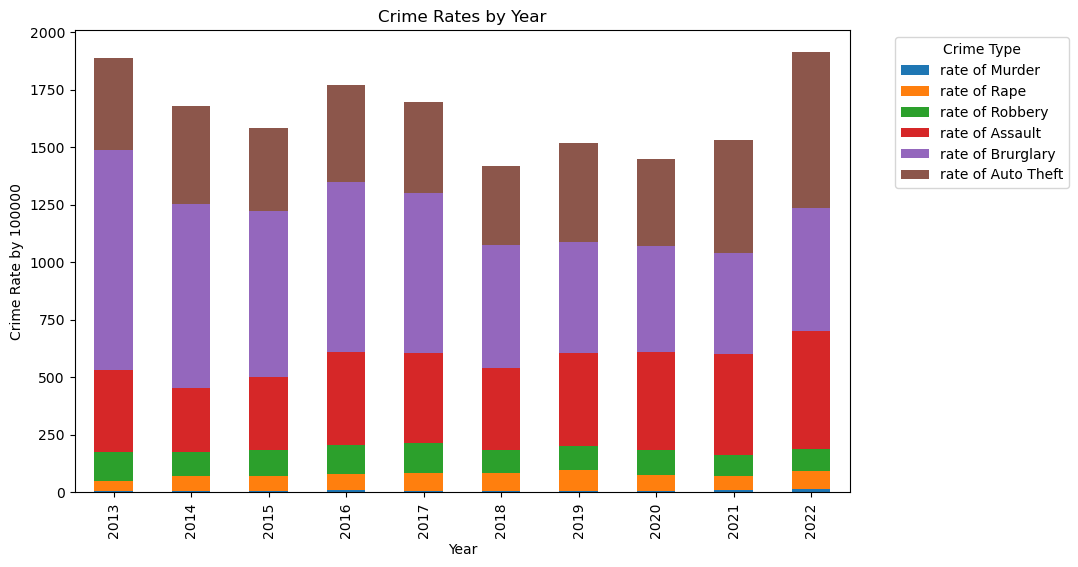

In [4]:
#create bar graph of overall crime rates by year
rates.plot.bar(x='Year', stacked=True, figsize=(10, 6))

plt.title("Crime Rates by Year")
plt.xlabel("Year")
plt.ylabel("Crime Rate by 100000")
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

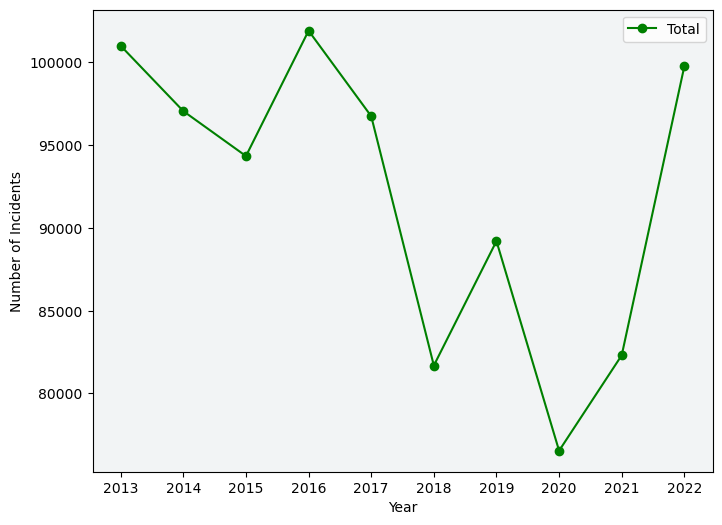

In [5]:
#create line graph of total crime by year
total.plot.line(x='Year', y='Total', color='green', marker='o', figsize=(8, 6))
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.xticks(total['Year'])
plt.gca().set_facecolor('#F2F4F5')

plt.show()

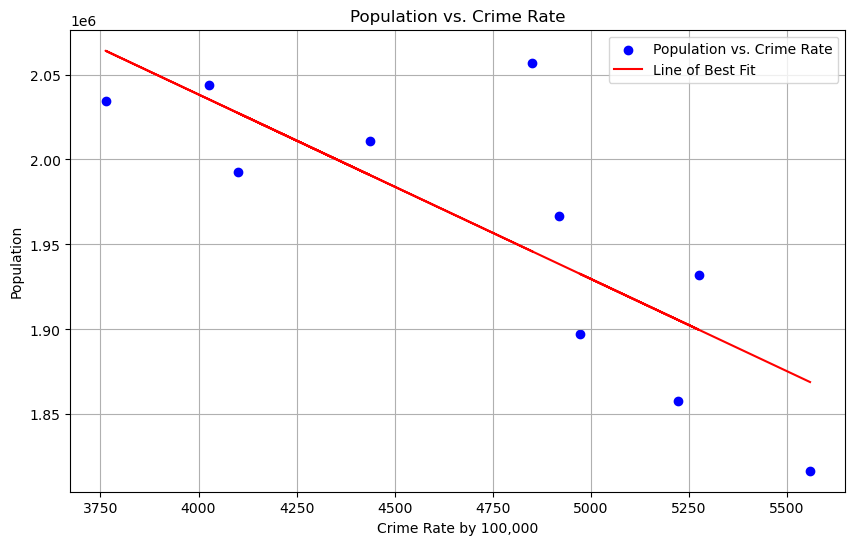

In [6]:
#create scatter plot with line of best fit comparing crime rates to population
plt.figure(figsize=(10, 6))
plt.scatter(crime_data['Total rate'], crime_data['Population'], color='blue', label='Population vs. Crime Rate')

# Fit a line of best fit
fit = np.polyfit(crime_data['Total rate'], crime_data['Population'], 1)
fit_fn = np.poly1d(fit)
plt.plot(crime_data['Total rate'], fit_fn(crime_data['Total rate']), color='red', label='Line of Best Fit')

plt.title("Population vs. Crime Rate")
plt.xlabel("Crime Rate by 100,000")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
t_stat, p_value = stats.ttest_ind(crime_data["Total rate"], crime_data["Population"], equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -75.02568409367149
P-value: 6.698719925519385e-14


In [8]:
pearson_corr, _ = pearsonr(crime_data["Total rate"], crime_data["Population"])
print("Pearson correlation coefficient:", pearson_corr)

Pearson correlation coefficient: -0.7907564525629629


/var/folders/1d/ndtr0v9n28x_0wcqd79zhwbm0000gn/T/ipykernel_54650/3863079378.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_df["Population"] = pd.to_numeric(population_df["Population"], errors='coerce')
/var/folders/1d/ndtr0v9n28x_0wcqd79zhwbm0000gn/T/ipykernel_54650/3863079378.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_rate_df["Total rate"] = pd.to_numeric(crime_rate_df["Total rate"], errors='coerce')
/var/folders/1d/ndtr0v9n28x_0wcqd79zhwbm0000gn/T/ipykernel_54650/3863079378.

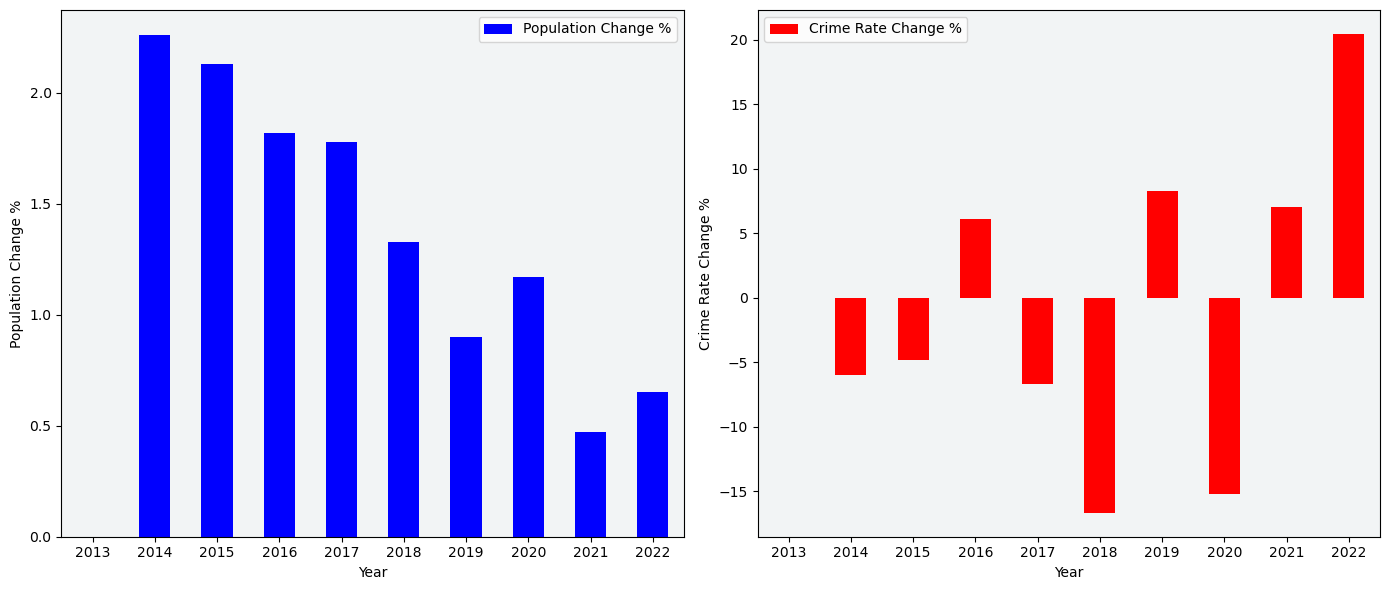

In [9]:
# Calculate the population and crime rate change of the metropolitan city over 10 years 
# Selecting relevant columns from crime_data
population_df = crime_data[["Year", "Population"]]
crime_rate_df = crime_data[["Year", "Total rate"]]

# Convert data type of "Population" and "Total rate" columns to numeric
population_df["Population"] = pd.to_numeric(population_df["Population"], errors='coerce')
crime_rate_df["Total rate"] = pd.to_numeric(crime_rate_df["Total rate"], errors='coerce')

# Calculate percentage change
population_df["Population Change %"] = round(population_df["Population"].pct_change() * 100, 2)
crime_rate_df["Crime Rate Change %"] = round(crime_rate_df["Total rate"].pct_change() * 100, 2)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))  

# Plot Population Change %
population_df.plot(kind='bar', x='Year', y='Population Change %', ax=ax1, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Population Change %')
ax1.set_xticklabels(population_df['Year'], rotation=0)  


# Plot Crime Rate Change %
crime_rate_df.plot(kind='bar', x='Year', y='Crime Rate Change %', ax=ax2, color='red')
ax2.set_xlabel('Year')
ax2.set_ylabel('Crime Rate Change %')
ax2.set_xticklabels(crime_rate_df['Year'], rotation=0)  


# Show the plot
ax1.set_facecolor('#F2F4F5')
ax2.set_facecolor('#F2F4F5')

plt.tight_layout()  
plt.show()

In [10]:
#mean of covid year crime
covid_years=[2020,2021]
covid_crime=crime_rate_df[crime_rate_df["Year"].isin(covid_years)]
mean_crime_rate_covid = covid_crime["Total rate"].mean()
mean_crime_rate_covid

3895.05

In [11]:
#mean of standard year crime
stand_crime=crime_rate_df[~crime_rate_df["Year"].isin(covid_years)]
mean_stand_crime = stand_crime["Total rate"].mean()
mean_stand_crime

4917.15

In [12]:
#t-test
t_stat, p_value=stats.ttest_ind(covid_crime["Total rate"], stand_crime["Total rate"], equal_var=False)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -4.81736654833359
P-value: 0.005091084408194117
